# Analyzing the Lagos State Real Estate Market II
In this project, we will be analyzing the Lagos real estate market in order to understand the relationship between certain important features and price. Our dataset has been collected from the property website `http://privateproperty.com.ng`.

We've previously cleaned this dataset, and it is ready for analysis. The dataset has the following features:
* `Title`: Title of the Listings
* `Location`: Address of the Listing
* `Listing_Type`: i.e. Rent, Sale, Shortlet
* `Price`: Price for sale or rent. Note that all rental prices are annual rents
* `Beds`: Number of bedrooms in this listing
* `Baths`: Number of bathrooms in this listing
* `Toilets`: Number of Toilets in this listing
* `City`: City in Lagos where the property is located
* `Location_Area`: i.e. whether property is located on the Island or Mainland of Lagos.
* `Date_Added`: Date listing was added
* `Date_Updated`: Date listing was updated

Let's load the dataset and conduct some preliminary statistical analysis.

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import re
import datetime as dt

%matplotlib inline
style.use('fivethirtyeight')
# sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('private_property_listing.csv')
df.head()

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets
0,2 BEDROOM DUPLEX FOR RENT,Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,6000000.0,2023-02-21,2023-02-21,2.0,3.0,3.0
1,3 BEDROOM HOUSE FOR RENT,Ikoyi Lagos,Rent,Ikoyi,Island,10000000.0,2022-12-08,2023-02-21,3.0,3.0,4.0
2,3 BEDROOM BLOCK OF FLATS FOR RENT,Off Admiralty Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,5500000.0,2023-02-05,2023-02-21,3.0,3.0,4.0
3,3 BEDROOM BLOCK OF FLATS FOR RENT,Oniru Oniru Victoria Island Lagos,Rent,Victoria Island,Island,6500000.0,2023-02-05,2023-02-21,3.0,3.0,4.0
4,3 BEDROOM TERRACE FOR RENT,Banana Island Ikoyi Lagos,Rent,Ikoyi,Island,16000000.0,2023-01-05,2023-02-21,3.0,3.0,4.0


### Preliminary Exploratory Analysis
We'll use some pandas methods to overview the dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31528 entries, 0 to 31527
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          31528 non-null  object 
 1   Location       31528 non-null  object 
 2   Listing_Type   31528 non-null  object 
 3   City           31528 non-null  object 
 4   Location_Area  31528 non-null  object 
 5   Price          31528 non-null  float64
 6   Date_Added     31528 non-null  object 
 7   Date_Updated   31528 non-null  object 
 8   Beds           31424 non-null  float64
 9   Baths          31424 non-null  float64
 10  Toilets        31424 non-null  float64
dtypes: float64(4), object(7)
memory usage: 2.6+ MB


In [4]:
df.describe(include='all')

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets
count,31528,31528,31528,31528,31528,3.152800e+04,31528,31528,31424.000000,31424.000000,31424.000000
unique,179,12452,2,21,2,NaN,2486,2361,NaN,NaN,NaN
top,3 BEDROOM FLAT & APARTMENT FOR RENT,Lekki Phase 1 Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,NaN,2023-02-09,2023-02-20,NaN,NaN,NaN
freq,5879,799,31183,10861,20454,NaN,246,2309,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.573356e+07,NaN,NaN,2.693992,2.596710,2.007860
std,NaN,NaN,NaN,NaN,NaN,6.814720e+09,NaN,NaN,1.476496,1.649778,2.077203
min,NaN,NaN,NaN,NaN,NaN,1.000000e+05,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.200000e+06,NaN,NaN,2.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,NaN,3.000000,3.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06,NaN,NaN,4.000000,4.000000,4.000000


Update date datatype for future analysis.

In [5]:
df['Date_Added'] = pd.to_datetime(df['Date_Added'], format='%Y-%m-%d')
df['Date_Updated'] = pd.to_datetime(df['Date_Updated'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31528 entries, 0 to 31527
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          31528 non-null  object        
 1   Location       31528 non-null  object        
 2   Listing_Type   31528 non-null  object        
 3   City           31528 non-null  object        
 4   Location_Area  31528 non-null  object        
 5   Price          31528 non-null  float64       
 6   Date_Added     31528 non-null  datetime64[ns]
 7   Date_Updated   31528 non-null  datetime64[ns]
 8   Beds           31424 non-null  float64       
 9   Baths          31424 non-null  float64       
 10  Toilets        31424 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 2.6+ MB


From this statistical analysis, we see a few things:
* the most popular kind of listing is a 3-bedroom apartment rental
* The most popular City for listings is Lekki and the Island is the most popular location area
* Most of the Listings are Rent listings
* The values in the price column range from 100,000 to 1.2trillion, however interquartile range is between 1.2million to 7million. The large max value has skewed the mean further to the right of the median. This is a right-skewed distribution.
* We need to conduct further analysis to see date ranges.
* On average, properties have 2.7 beds, 2.6 baths and 2 toilets. This reflects the fact we highlighted earlier that the 3-bedroom apartment is the most popular listing.

We'll conduct some further statistical analysis.

## Exploratory Data Analysis
This project analyzes the real estate market in Lagos, Nigeria

Analytical Questions
1. What is the average rent per city in Lagos?
2. What are the cities with the highest and lowest rents (actual, mean, median)?
3. Which cities provide proeprty with rents within mean and median values.
4. For a person of X income range, what cities provide optimum rental value for a single person, a married couple, a family of 5 (the average family size in Lagos)?
5. Visualize and explain the correlation if any between number of bedrooms and bathrooms and rental value.
6. Visualize and explain the correlation if any, between the number of bedrooms and bathroom and city.
7. What is the state of affordable housing in Lagos?
    a. What is the median income in Lagos?
    b. How much of the property market in available within that range?
    c. Ratio of demand (available renters) v. supply (number of property within their range)
8. What does the dataset tell us about the housing deficit and the skewed housing market in Lagos?
9. The rate of change / inflation in the Lagos real estate market
10. ...
    
Next Steps / Things Omitted from the Analysis
1. ...


Dashboard / App

With:

* Monthly Income
* Choice of Location / City
* Number of Beds, Baths, Toilets
* Preference - Serviced / Not Serviced
* Preference - Furnished / Not Furnished

Provide user with a list of 10 possible rental options within and around their selection range.


### Rental Listings
We intend to explore the Lagos residential rental market. We'll drop commercial listings, separate the rent listings from the sale listings and conduct EDA on the rent listings.

In [6]:
commercial_listings = list()
for index, row in df.iterrows():
    if 'COMMERCIAL' in row['Title'] or 'SHOP' in row['Title']:
        commercial_listings.append(index)

df.iloc[commercial_listings]

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets
15,COMMERCIAL PROPERTY FOR RENT,Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,4000000.0,2023-01-13,2023-02-20,0.0,0.0,0.0
56,SHOP FOR RENT,Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,8600000.0,2023-02-03,2023-02-20,0.0,0.0,0.0
58,SHOP FOR RENT,Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,2000000.0,2023-02-03,2023-02-20,0.0,0.0,0.0
60,SHOP FOR RENT,Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,3603600.0,2023-02-03,2023-02-20,0.0,0.0,0.0
675,5 BEDROOM COMMERCIAL PROPERTY FOR RENT,Airport Road Ajao Estate Isolo Isolo Lagos,Rent,Isolo,Mainland,10000000.0,2022-09-29,2023-02-20,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
31432,COMMERCIAL PROPERTY FOR RENT,"Off Adebimpe Adewunmi Drive, Lekki Phase 1 Le...",Rent,Lekki,Island,900000.0,2014-06-18,2014-06-18,0.0,0.0,0.0
31439,COMMERCIAL PROPERTY FOR RENT,Awolowo Road Falomo Ikoyi Lagos,Rent,Ikoyi,Island,3500000.0,2014-06-04,2014-06-04,0.0,0.0,0.0
31441,COMMERCIAL PROPERTY FOR RENT,Adetokunbo Ademola Street Victoria Island Vic...,Rent,Victoria Island,Island,15000000.0,2014-05-20,2014-05-20,0.0,0.0,0.0
31443,COMMERCIAL PROPERTY FOR RENT,"Gateway City, Opic Junction Magodo Isheri Ike...",Rent,Ikeja,Mainland,2500000.0,2014-04-29,2014-04-29,0.0,0.0,0.0


In [7]:
df.drop(index=commercial_listings, inplace=True)

In [8]:
sale = df.loc[df['Listing_Type'] == 'Sale']
rent = df.loc[df['Listing_Type'] == 'Rent']

sale.describe()

,Price,Beds,Baths,Toilets
count,3.450000e+02,345.000000,345.000000,345.000000
mean,2.555217e+08,3.223188,3.217391,3.434783
std,6.115897e+08,1.746936,1.894527,2.344453
min,8.000000e+05,0.000000,0.000000,0.000000
25%,5.500000e+07,2.000000,2.000000,0.000000
50%,8.500000e+07,4.000000,4.000000,4.000000
75%,2.200000e+08,4.000000,5.000000,5.000000
max,4.000000e+09,6.000000,6.000000,7.000000


### Analysis of Rent Price in Lagos
Interestingly, all the price outliers in our dataset are in the rental listings. Let's review price listings in the rent dataframe that are 100million and over.

In [9]:
rent.describe()

,Price,Beds,Baths,Toilets
count,3.013100e+04,30040.000000,30040.000000,30040.000000
mean,6.470255e+07,2.743975,2.651798,2.037550
std,6.970385e+09,1.426424,1.608942,2.066777
min,1.000000e+05,0.000000,0.000000,0.000000
25%,1.200000e+06,2.000000,1.000000,0.000000
50%,3.000000e+06,3.000000,3.000000,2.000000
75%,7.000000e+06,4.000000,4.000000,4.000000
max,1.200000e+12,9.000000,9.000000,9.000000


In [10]:
len(rent['Price'].loc[rent['Price'] >= 100000000])

783

In [11]:
rent.loc[rent['Price'] >= 100000000]['City'].value_counts()

Lekki              406
Ikoyi              116
Ikeja               87
Victoria Island     65
Ajah                39
Ketu                18
Surulere            10
Agege               10
Isolo                8
Gbagada              7
Yaba                 6
Oshodi               4
Apapa                3
Ikorodu Road         2
Iju                  1
Mushin               1
Name: City, dtype: int64

There are 783 records with price values in excess of 100 million. Most of these properties are in Lekki. Some are clearly outliers, given their City locations. Let's draw a sample of 50 listings from this collection and analyze.

In [12]:
rent.loc[rent['Price'] >= 100000000].sample(50)

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets
13770,5 BEDROOM DUPLEX FOR RENT,Ajah Lagos,Rent,Ajah,Island,1.000000e+08,2022-09-19,2022-10-04,5.0,6.0,6.0
2224,2 BEDROOM BLOCK OF FLATS FOR RENT,Bluewaters Bloom Towers (bluewaters Phase 2) ...,Rent,Lekki,Island,1.200000e+08,2022-05-27,2023-02-20,2.0,2.0,3.0
498,4 BEDROOM DUPLEX FOR RENT,Osapa Lekki Lagos,Rent,Lekki,Island,1.500000e+08,2022-06-20,2023-02-20,4.0,4.0,5.0
9168,3 BEDROOM FLAT & APARTMENT FOR RENT,Off Adeola Odeku Victoria Island Victoria Isl...,Rent,Victoria Island,Island,1.600000e+08,2021-06-15,2022-12-08,3.0,3.0,0.0
9895,4 BEDROOM TERRACE FOR RENT,Ikate Elegushi Lekki Lagos,Rent,Lekki,Island,1.200000e+08,2022-06-25,2022-11-26,4.0,4.0,5.0
13797,LAND FOR RENT,Chevron Drive Lekki Lagos,Rent,Lekki,Island,1.000000e+08,2022-07-23,2022-10-04,0.0,0.0,0.0
2937,5 BEDROOM DUPLEX FOR RENT,Banana Island Ikoyi Lagos,Rent,Ikoyi,Island,6.500000e+08,2022-07-02,2023-02-20,5.0,5.0,5.0
11243,5 BEDROOM DUPLEX FOR RENT,Banana Island Road Ikoyi Ikoyi Lagos,Rent,Ikoyi,Island,1.300000e+09,2022-06-18,2022-11-15,5.0,5.0,6.0
11313,4 BEDROOM TERRACE FOR RENT,Ologolo Lekki Ologolo Lekki Lagos,Rent,Lekki,Island,1.650000e+08,2022-07-27,2022-11-15,4.0,5.0,0.0
14941,2 BEDROOM FLAT & APARTMENT FOR RENT,Ketu Lagos,Rent,Ketu,Mainland,2.000000e+09,2022-09-14,2022-09-14,2.0,2.0,3.0


From the sample, these values are clearly outlier values. We'll drop these values and plot the rent distribution.

In [13]:
rent.drop(index=rent.loc[rent['Price'] >= 100000000].index, inplace=True)

In [14]:
rent.describe()

,Price,Beds,Baths,Toilets
count,2.934800e+04,29263.000000,29263.000000,29263.000000
mean,6.073462e+06,2.715921,2.622185,2.004955
std,1.082909e+07,1.412563,1.593109,2.045183
min,1.000000e+05,0.000000,0.000000,0.000000
25%,1.200000e+06,2.000000,1.000000,0.000000
50%,3.000000e+06,3.000000,3.000000,2.000000
75%,6.000000e+06,4.000000,4.000000,4.000000
max,9.900000e+07,9.000000,9.000000,9.000000


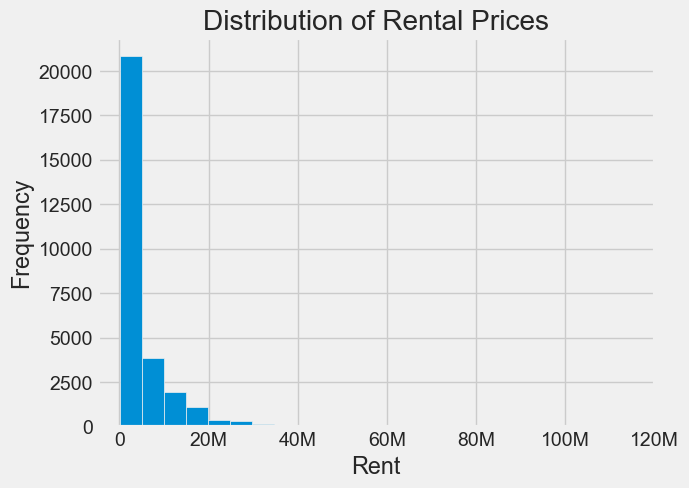

In [15]:
rent['Price'].plot.hist(bins=20)

locs, labels = plt.xticks()
labels = ['<20M', '0', '20M', '40M',
          '60M', '80M', '100M', '120M']

plt.xticks(ticks=locs[1:], labels=labels[1:])
plt.xlabel('Rent')
plt.title('Distribution of Rental Prices')
plt.show()

The average and standard deviation values for price have significantly reduced. However, the distribution remains very right-skewed. Let's see the distribution of price values below the 25th percentile and above the 75th percentile

In [16]:
price_u25 = rent['Price'].loc[rent['Price'] < rent['Price'].describe()[4]]
price_o75 = rent['Price'].loc[rent['Price'] > rent['Price'].describe()[-2]]

In [17]:
len(price_u25)

7078

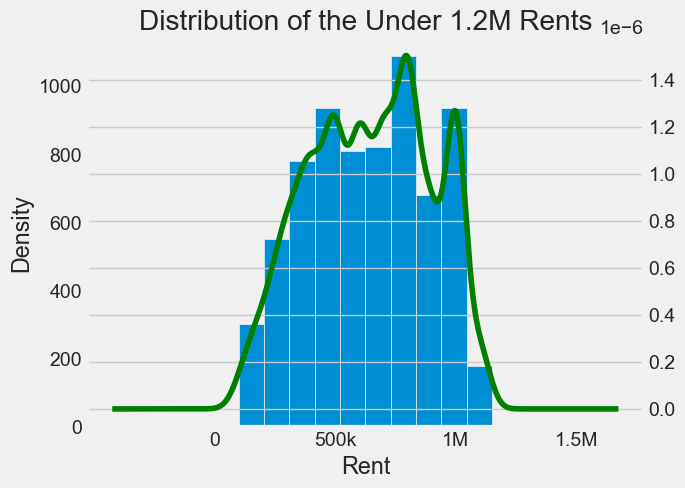

In [18]:
ax = price_u25.plot.hist()
price_u25.plot(kind='kde', ax=ax,
               secondary_y=True, color='green')

locs = ax.get_xticks()
labels = ax.get_xticklabels()
labels = ['<1M', '<500k', '0', '500k', '1M', '1.5M', '2M']
ax.set_xticks(ticks=locs[2:-1], labels=labels[2:-1])
ax.set_xlabel('Rent')
plt.title('Distribution of the Under 1.2M Rents')
plt.show()

There are 7,078 records below the 25th percentile and their distribution looks slightly uniform and slightly normal. Using only the kernel density plot, it looks even more normal. Let's review its mean, median and mode to determine what kind of distribution this plot is.

<AxesSubplot:ylabel='Density'>

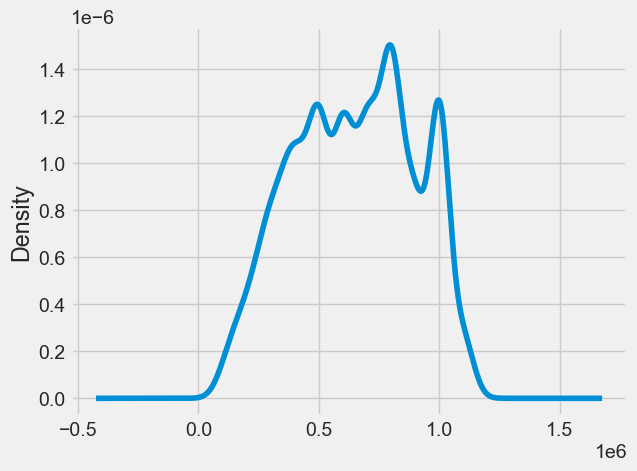

In [19]:
price_u25.plot.kde()

In [20]:
price_u25.describe()

count    7.078000e+03
mean     6.463907e+05
std      2.510097e+05
min      1.000000e+05
25%      4.500000e+05
50%      6.500000e+05
75%      8.500000e+05
max      1.150000e+06
Name: Price, dtype: float64

In [21]:
price_u25.mode()

0    1000000.0
Name: Price, dtype: float64

The mode is to the right of the median, which is slightly to the right of the mean. This distribution is left-skewed. The majority of the distribution is under 1million. This means that for lower income renters, the majority of properties have an annual rental value under NGN1 million. However, with a median rental value of NGN650,000, renters looking to rent within the lower range are expected to earn an annual income of around NGN2.16million (or NGN180,550/ month) in order for rent to be the recommended 30% of their income. 

In Nigeria, middle class earners have an income range within NGN75,000 - NGN100,000 a month. For this class, who are interested in renting in the lower rent market, 72-83% of their income will be spent on rent.

In [22]:
(price_u25 < 1000000).sum()

6006

In [23]:
(price_u25 > 1000000).sum()

180

Let's plot the over 75th percentile of the price variable.

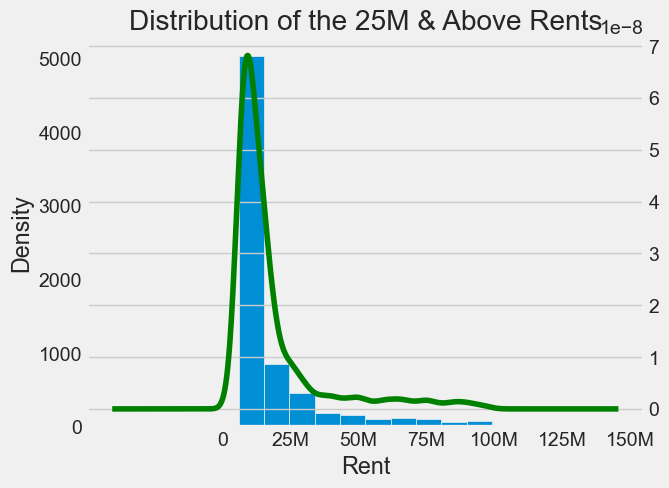

In [24]:
ax = price_o75.plot.hist()
price_o75.plot(kind='kde', ax=ax,
               secondary_y=True, color='green')

locs = ax.get_xticks()
labels = ax.get_xticklabels()
labels = ['<50M', '<25M', '0', '25M', '50M',
          '75M', '100M', '125M', '150M', '175M']
ax.set_xticks(ticks=locs[2:-1], labels=labels[2:-1])
ax.set_xlabel('Rent')
plt.title('Distribution of the 25M & Above Rents')
plt.show()

In [25]:
len(price_o75)

7134

There are more listings in the over 75th percentile range (7134) than in the under 25th percentile range (7078). This raises an issue concerning affordable housing within the city.

In [26]:
(price_o75 <= 25000000).sum()

6107

The over 75th percentile distribution is right-skewed and the majority of the distribution has values under 25million. Let's plot the price distribution for price values below 50M and below 25M.

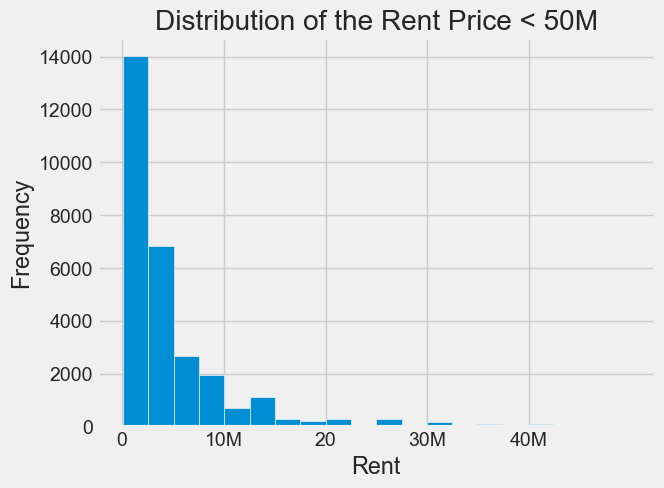

In [27]:
rent['Price'].loc[rent['Price'] < 50000000].plot.hist(bins=20)
locs, labels = plt.xticks()
labels = ['<10M', '0', '10M', '20', '30M', '40M', '50M', '60M']

plt.xticks(ticks=locs[1:-2], labels=labels[1:-2])
plt.xlabel('Rent')
plt.title('Distribution of the Rent Price < 50M')
plt.show()

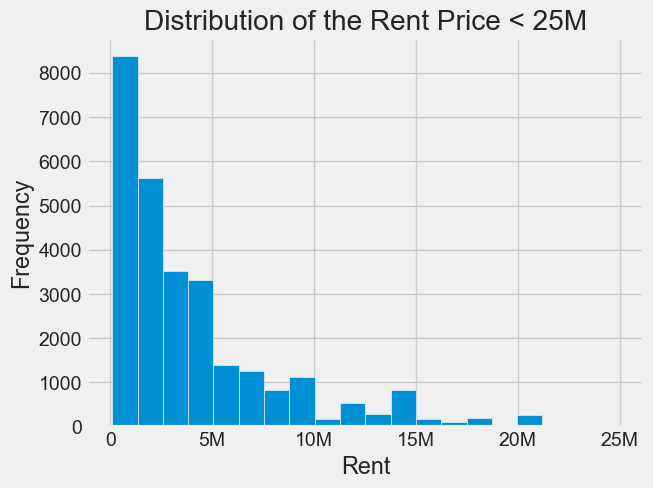

In [28]:
rent['Price'].loc[rent['Price'] < 25000000].plot.hist(bins=20)
locs, labels = plt.xticks()
labels = ['<5M', '0', '5M', '10M', '15M', '20M', '25M', '30M']

plt.xticks(ticks=locs[1:-1], labels=labels[1:-1])
plt.xlabel('Rent')
plt.title('Distribution of the Rent Price < 25M')
plt.show()

Our analysis of the price feature tells us the following:
* The price range in the rental dataset is very wide, however most of the listings are under 25million.
* The dataset is right-skewed. 20.5% of the dataset have values under NGN1million. Another 21% have values in the range between NGN6 million and NGN25 million. The remainder 60% (less a very small minority) is in the IQR.

We will drop all records where the price is over NGN25 million.

In [29]:
rent.drop(index=(rent.loc[rent['Price'] > 25000000]).index, inplace=True)
rent.sample(30)

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets
9327,4 BEDROOM DUPLEX FOR RENT,Emina Crescent Off Toyin Street Ikeja Ikeja L...,Rent,Ikeja,Mainland,5000000.0,2022-12-06,2022-12-06,4.0,4.0,4.0
27362,22 BEDROOM HOUSE FOR RENT,"Cmd Road, Magodo Shangisha Magodo Shangisha K...",Rent,Ketu,Mainland,4000000.0,2015-10-19,2015-10-19,NaN,NaN,NaN
4317,3 BEDROOM BLOCK OF FLATS FOR RENT,1004 Estate Victoria Island Victoria Island L...,Rent,Victoria Island,Island,7500000.0,2023-02-15,2023-02-15,3.0,3.0,4.0
19461,1 BEDROOM DUPLEX FOR RENT,Brentwood Estate By Meadow Hall. Ikate Elegus...,Rent,Lekki,Island,1500000.0,2020-12-30,2020-12-30,1.0,2.0,0.0
5308,1 BEDROOM FLAT & APARTMENT FOR RENT,By Brown Road Aguda Surulere Lagos,Rent,Surulere,Mainland,900000.0,2023-02-10,2023-02-10,1.0,2.0,2.0
5330,1 BEDROOM FLAT & APARTMENT FOR RENT,Off Itire Road Onipede Street Lawason Suruler...,Rent,Surulere,Mainland,300000.0,2023-02-10,2023-02-10,1.0,1.0,1.0
6884,3 BEDROOM FLAT & APARTMENT FOR RENT,Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,3000000.0,2023-01-25,2023-01-25,3.0,3.0,4.0
23338,4 BEDROOM TERRACE FOR RENT,Off First Bank Street Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,8000000.0,2017-04-06,2017-04-06,4.0,4.0,0.0
28993,4 BEDROOM DUPLEX FOR RENT,"Ocean Bay Estate, Off Lekki Epe Expressway Ag...",Rent,Lekki,Island,2500000.0,2015-06-05,2015-06-05,4.0,5.0,0.0
25528,5 BEDROOM DUPLEX FOR RENT,Off Fatai Arubieke Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,10000000.0,2016-04-27,2016-04-27,5.0,5.0,6.0


Finally, let's consider which features are most correlated with rent. We'll consider location area, along with beds, baths and toilets. Let's encode the location area column as follows:
1 = Island
0 = Mainland

In [30]:
rent.head()

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets
0,2 BEDROOM DUPLEX FOR RENT,Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,6000000.0,2023-02-21,2023-02-21,2.0,3.0,3.0
1,3 BEDROOM HOUSE FOR RENT,Ikoyi Lagos,Rent,Ikoyi,Island,10000000.0,2022-12-08,2023-02-21,3.0,3.0,4.0
2,3 BEDROOM BLOCK OF FLATS FOR RENT,Off Admiralty Lekki Phase 1 Lekki Lagos,Rent,Lekki,Island,5500000.0,2023-02-05,2023-02-21,3.0,3.0,4.0
3,3 BEDROOM BLOCK OF FLATS FOR RENT,Oniru Oniru Victoria Island Lagos,Rent,Victoria Island,Island,6500000.0,2023-02-05,2023-02-21,3.0,3.0,4.0
4,3 BEDROOM TERRACE FOR RENT,Banana Island Ikoyi Lagos,Rent,Ikoyi,Island,16000000.0,2023-01-05,2023-02-21,3.0,3.0,4.0


In [31]:
rent['Location_Area_Encoded'] = rent['Location_Area'].apply(lambda x: 1 if x == 'Island' else 0)

In [32]:
rent.corr()['Price']

Price                    1.000000
Beds                     0.378159
Baths                    0.371857
Toilets                  0.208933
Location_Area_Encoded    0.387092
Name: Price, dtype: float64

Beds, baths, and location area are positively correlated with price. 

### How Housing is Spread by Location in Lagos
Location is a huge part of searching for residential rentals. We've segmented our dataset along City and Location Area lines. We'll explore the records to find patterns.

In [33]:
rent['Location_Area'].value_counts()

Island      18147
Mainland    10174
Name: Location_Area, dtype: int64

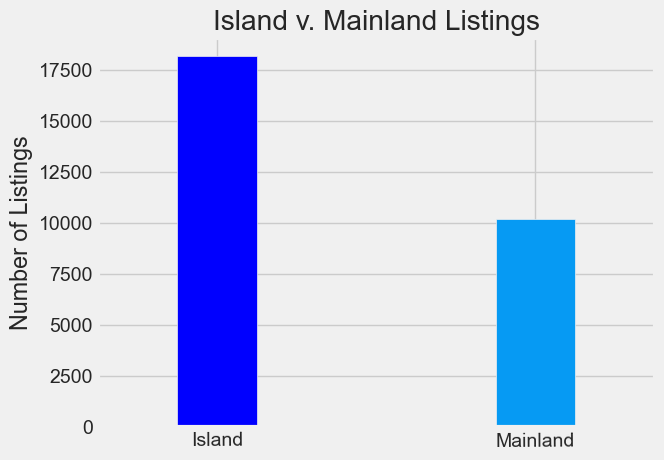

In [34]:
rent['Location_Area'].value_counts().plot.bar(width=.25, rot=.35,
                                              color=['#0000FF',
                                                     '#069AF3'])
plt.ylabel('Number of Listings')
plt.title('Island v. Mainland Listings')
plt.show()

There are nearly twice as many listings on the Island as are on the Mainland. Let's chart average and median rent between both location areas.

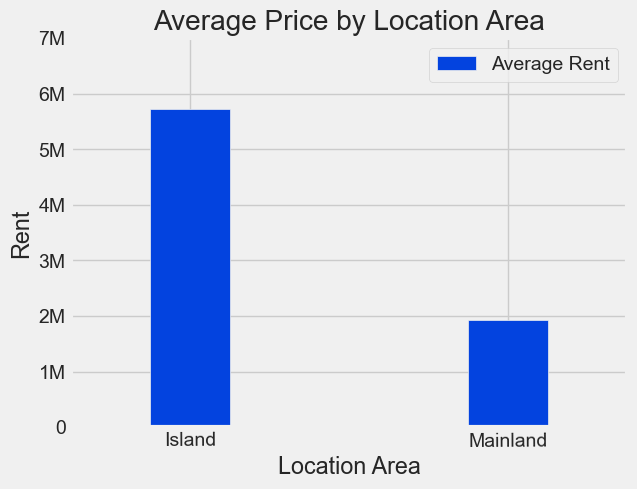

In [35]:
legend = ['Average Rent']
rent.groupby('Location_Area').agg({'Price':np.mean}).plot.bar(width=.25, rot=.35,
                                                              color='#0343DF',
                                                              label=legend)
locs, labels = plt.yticks()
labels = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']

plt.yticks(ticks=locs, labels=labels)
plt.ylabel('Rent')
plt.xlabel('Location Area')
plt.title('Average Price by Location Area')
plt.legend(labels=legend)
plt.show()

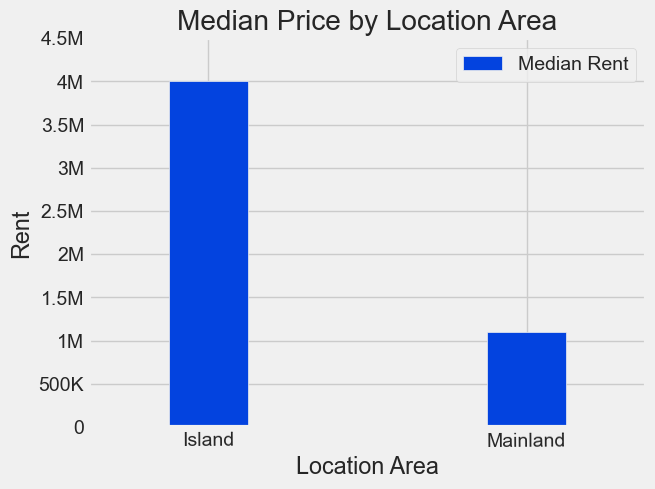

In [36]:
rent.groupby('Location_Area').agg({'Price':np.median}).plot.bar(width=.25, rot=.35,
                                                                color='#0343DF',
                                                                label='Median Rent')
locs, labels = plt.yticks()
labels = ['0', '500K', '1M', '1.5M', '2M',
          '2.5M', '3M', '3.5M', '4M', '4.5M']

plt.yticks(ticks=locs, labels=labels)
plt.ylabel('Rent')
plt.xlabel('Location Area')
plt.title('Median Price by Location Area')
plt.legend(labels=['Median Rent'])
plt.show()

More properties are listed on the Island than on the Mainland. The average price difference between location areas is much wider. On average, rent on the Mainland is NGN2 million, while rent on the Island is slightly under NGN6 million. Median rent on the Mainland is around 1.2 million and NGN4 million on the Island.

The top 10 cities with the highest & lowest average and median rents are plotted below:

In [37]:
top_10_mean = rent.groupby('City').agg({'Price': np.mean}).sort_values(by='Price', ascending=False).reset_index()[:10]
top_10_mean = top_10_mean.sort_values('Price').set_index('City')

top_10_median = rent.groupby('City').agg({'Price': np.median}).sort_values(by='Price', ascending=False).reset_index()[:10]
top_10_median = top_10_median.sort_values('Price').set_index('City')

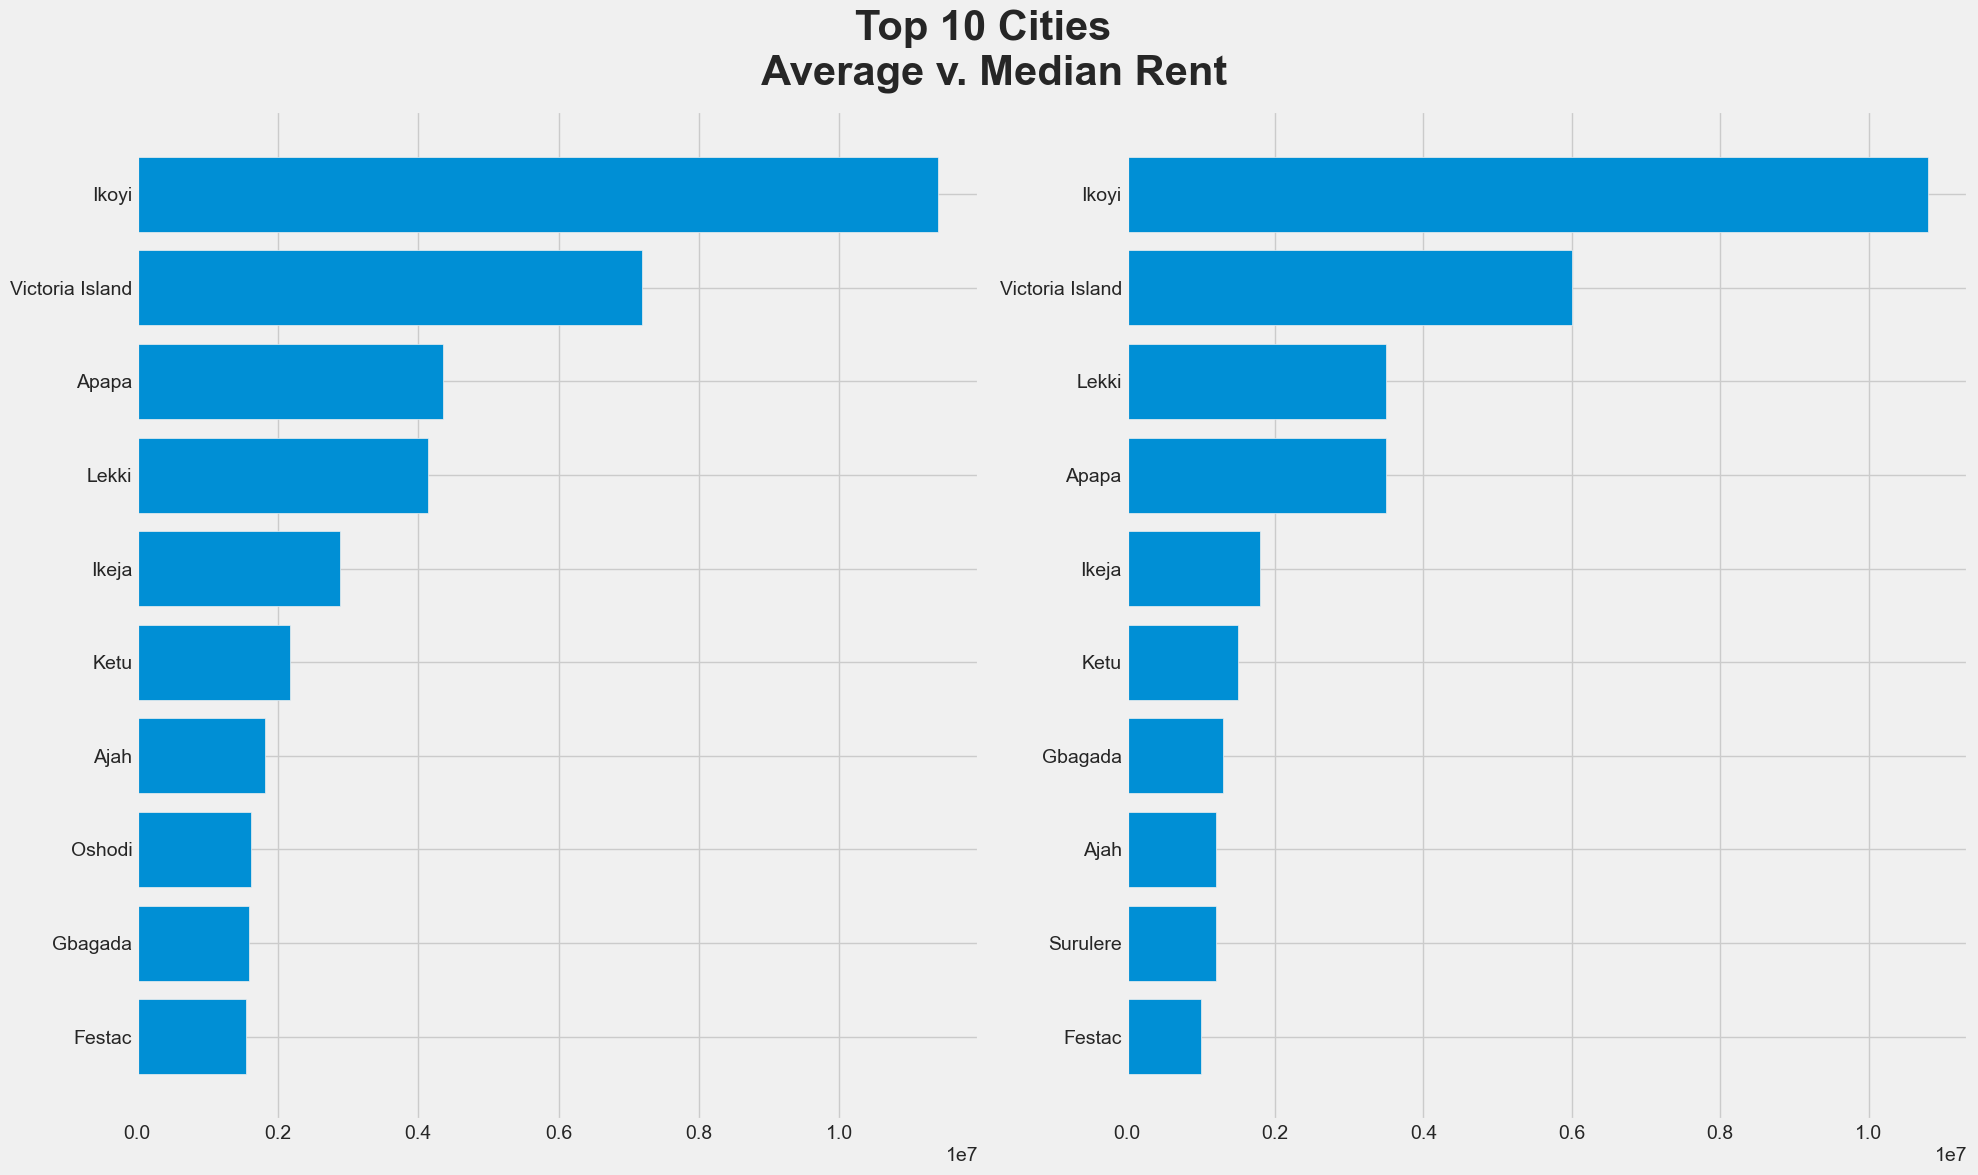

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
ax1.barh(top_10_mean.index, top_10_mean['Price'])
ax2.barh(top_10_median.index, top_10_median['Price'])
fig.suptitle('Top 10 Cities \n Average v. Median Rent', size=30, weight='bold')
plt.tight_layout()
plt.show()

The top 5 cities with the highest in average and median rent prices are identical.

In [39]:
bottom_10_mean = rent.groupby('City').agg({'Price': np.mean}).sort_values(by='Price', ascending=False).reset_index()[-10:]
bottom_10_mean = bottom_10_mean.sort_values('Price').set_index('City')

bottom_10_median = rent.groupby('City').agg({'Price': np.median}).sort_values(by='Price', ascending=False).reset_index()[-10:]
bottom_10_median = bottom_10_median.sort_values('Price').set_index('City')

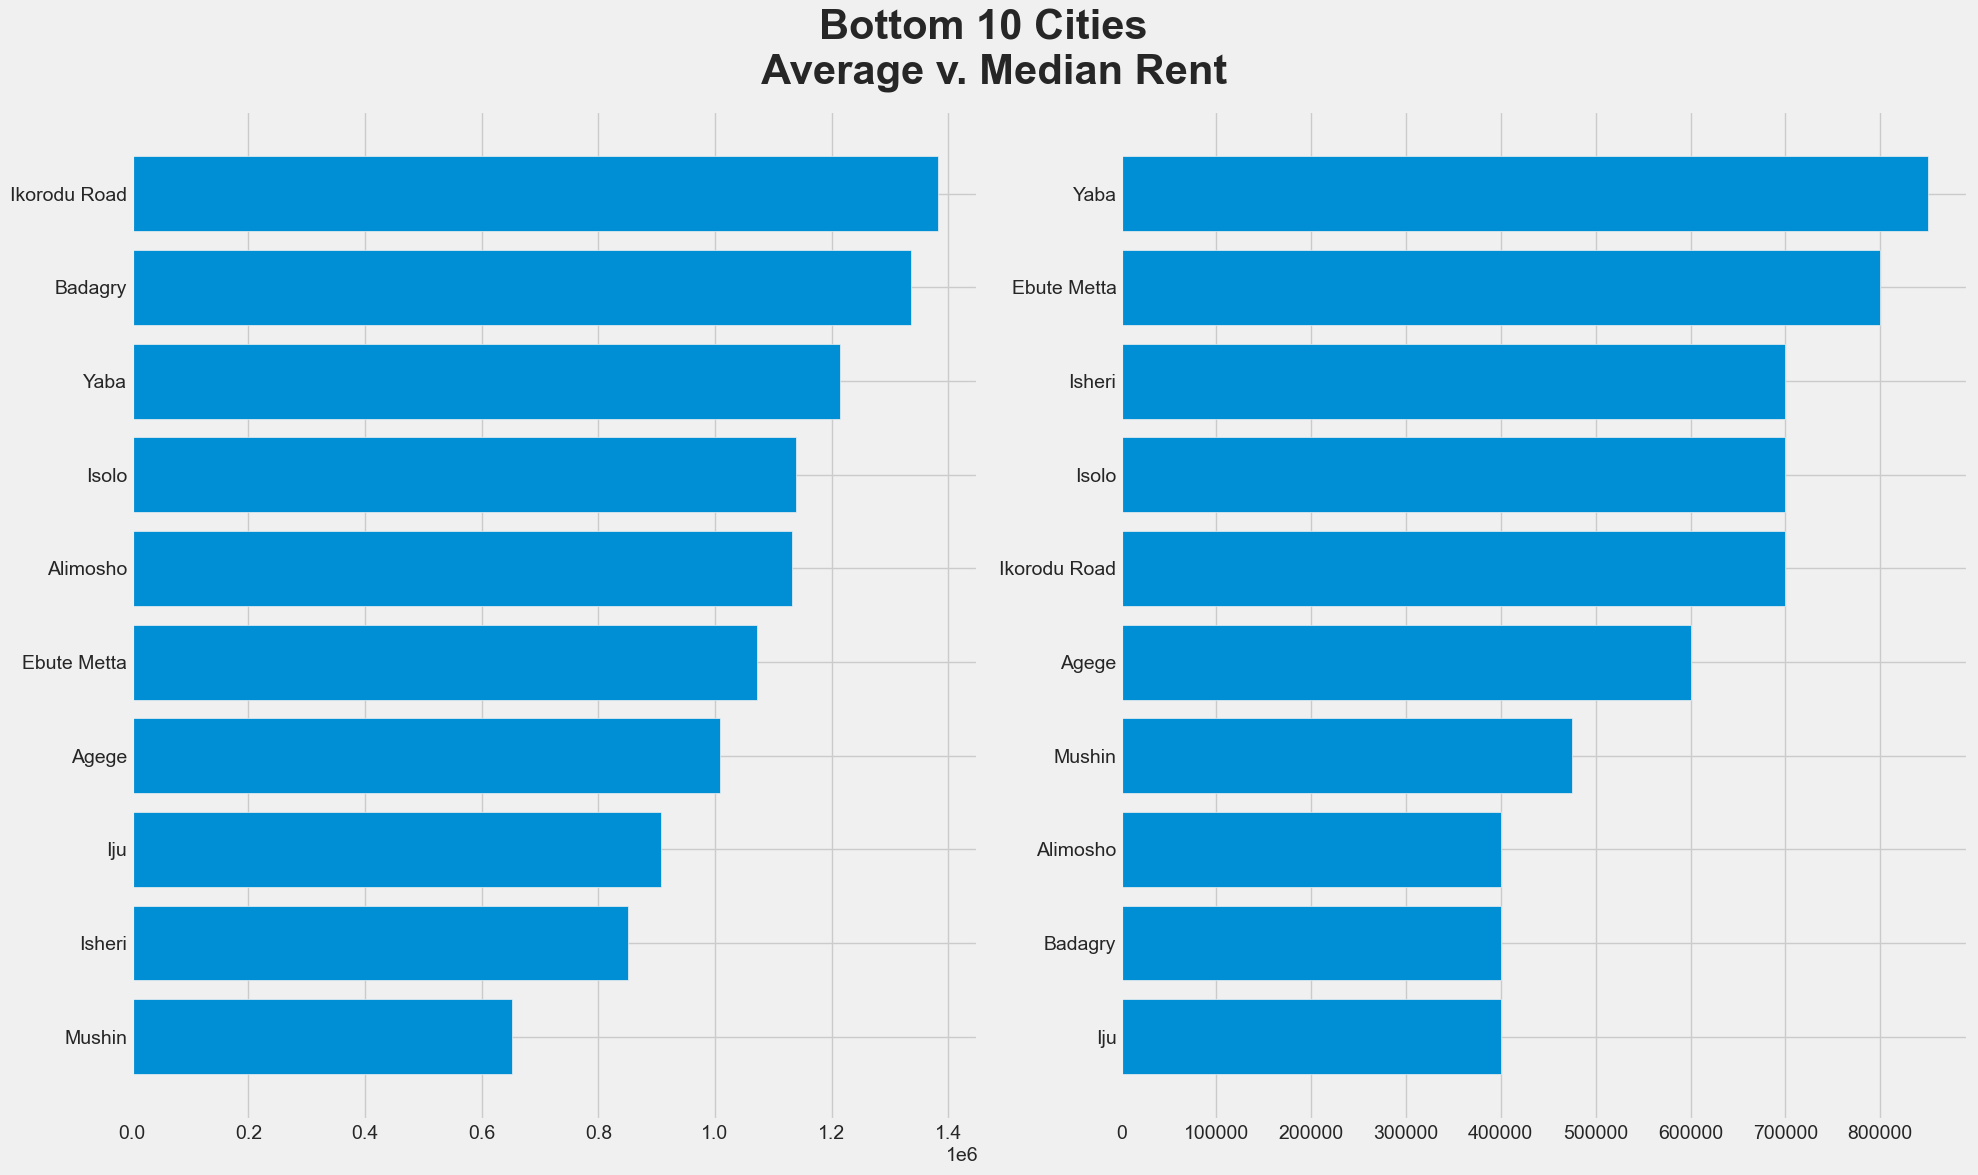

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
ax1.barh(bottom_10_mean.index, bottom_10_mean['Price'])
ax2.barh(bottom_10_median.index, bottom_10_median['Price'])
fig.suptitle('Bottom 10 Cities \n Average v. Median Rent', size=30, weight='bold')
plt.tight_layout()
plt.show()

The average and median rent in the most expensive city is over 10x the average and median rent in the least expensive cities. 

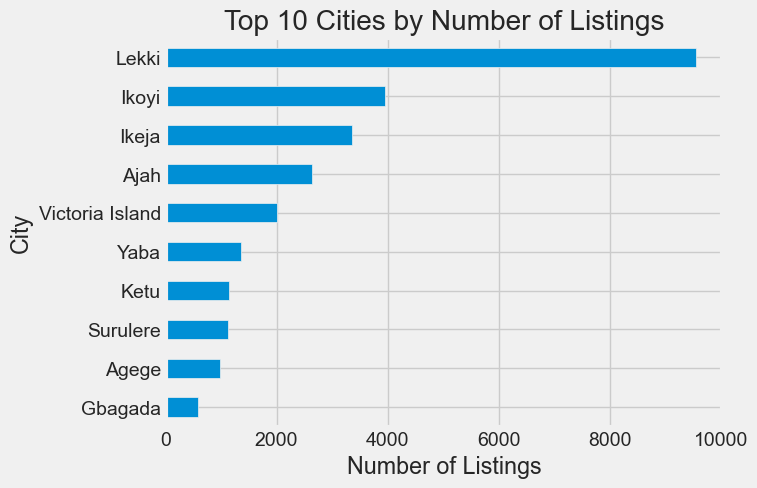

In [41]:
rent.groupby('City').agg('count').sort_values(by='Title', ascending=True)['Title'][-10:].plot.barh()
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.title('Top 10 Cities by Number of Listings')
plt.show()

The top location for listings is Lekki, having almost 2.5x more listings than the 2nd most popular location, Ikoyi. Only 3 cities from the low rent market is featured in the chart (Yaba, Surulere and Agege). The remainder are in the high rent market.

### Property Sizes - Beds, Baths and Toilets

<AxesSubplot:>

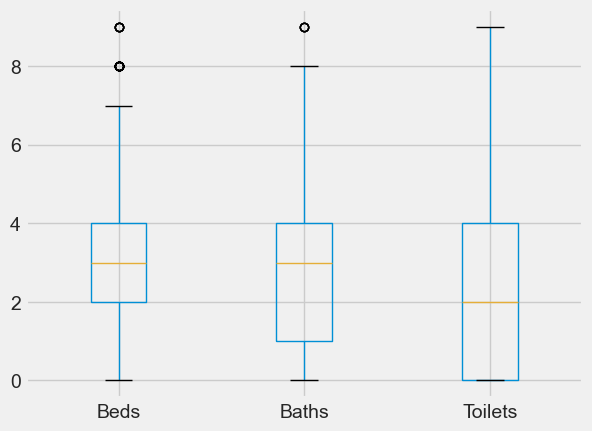

In [42]:
rent.boxplot(column=['Beds', 'Baths', 'Toilets'])

The median value in the dataset is a 3 bed, 3 bath, 2 toilet home. This makes sense given that the residential market may be populated by single families, with an average size of 5. We see some significant outliers, including values above 6. Let's check to see what kind of listings / properties these are

### How Have Listings Evolved Over the Years

In [43]:
rent['Date_Added'].min()

Timestamp('2013-09-02 00:00:00')

In [44]:
rent['Date_Added'].max()

Timestamp('2023-06-02 00:00:00')

The oldest listing is from September 2013 and the newest is from June 2023. Given today's date (24th February), this is an erroneous listing. Let's analyze it.

In [45]:
rent.loc[rent['Date_Added'] == rent['Date_Added'].max()]

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets,Location_Area_Encoded
2275,3 BEDROOM BLOCK OF FLATS FOR RENT,Prime Water Garden 2 Lekki Expressway Lekki L...,Rent,Lekki,Island,3500000.0,2023-06-02,2023-02-20,3.0,3.0,4.0,1


This is an error that can be quickly changed. Given the value in date updated, we can update the month value in date added to February

In [46]:
rent.at[2275, 'Date_Added'] = '2023-02-06'
rent.at[2275, 'Date_Added']

Timestamp('2023-02-06 00:00:00')

In [47]:
rent.loc[2275]

Title                                    3 BEDROOM BLOCK OF FLATS FOR RENT
Location                  Prime Water Garden 2 Lekki Expressway Lekki L...
Listing_Type                                                          Rent
City                                                                 Lekki
Location_Area                                                       Island
Price                                                            3500000.0
Date_Added                                             2023-02-06 00:00:00
Date_Updated                                           2023-02-20 00:00:00
Beds                                                                   3.0
Baths                                                                  3.0
Toilets                                                                4.0
Location_Area_Encoded                                                    1
Name: 2275, dtype: object

Let's check for the max values again

In [48]:
rent['Date_Added'].max()

Timestamp('2023-02-22 00:00:00')

The new max value is 22nd of February.
Let's conduct the same analysis on the date updated column.

In [49]:
rent['Date_Updated'].min()

Timestamp('2013-09-02 00:00:00')

In [50]:
rent['Date_Updated'].max()

Timestamp('2023-02-22 00:00:00')

The date updated values look fine. The oldest update is from September 2013 and the newest value is from February 2023.

From this analysis, we can tell that the spread of the chart is 10 years. Let's chart average and median price over the 10 year period.

In [51]:
rent.groupby(by=[rent.Date_Added.dt.year,  rent.Date_Added.dt.month]).agg({'Price':np.mean})

Price
Date_Added Date_Added              
2013       9           5.500000e+06
           10          2.355000e+07
           12          1.500000e+06
2014       1           2.000000e+06
           3           2.650000e+06
...                             ...
2022       10          3.449318e+06
           11          3.188625e+06
           12          3.092768e+06
2023       1           5.735438e+06
           2           3.506771e+06

[112 rows x 1 columns]

<AxesSubplot:xlabel='Date_Added,Date_Added'>

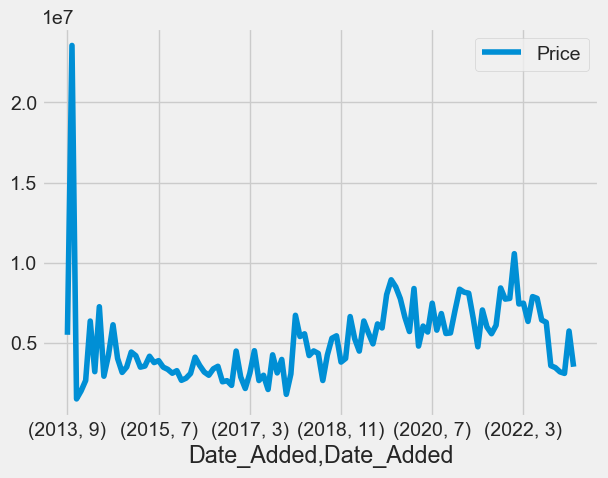

In [52]:
rent.groupby(by=[rent.Date_Added.dt.year,  rent.Date_Added.dt.month]).agg({'Price':np.mean}).plot()

<AxesSubplot:xlabel='Date_Added,Date_Added'>

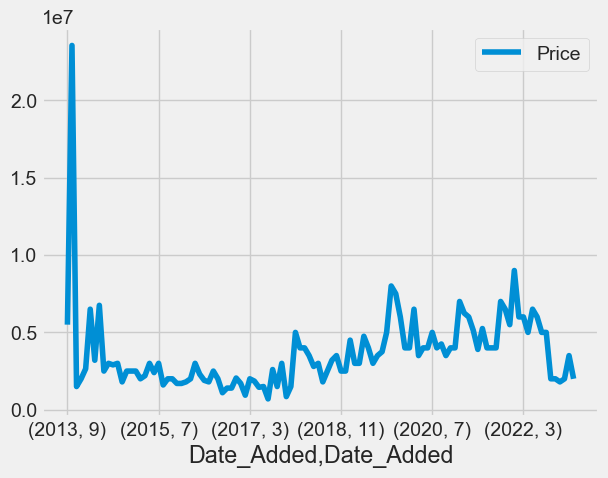

In [53]:
rent.groupby(by=[rent.Date_Added.dt.year, rent.Date_Added.dt.month]).agg({'Price': np.median}).plot()

In both charts, there's a spike from millions to 10s of millions in 2013. Let's see why.

In [54]:
rent.loc[rent['Date_Added'].dt.year == 2013]

,Title,Location,Listing_Type,City,Location_Area,Price,Date_Added,Date_Updated,Beds,Baths,Toilets,Location_Area_Encoded
31524,3 BEDROOM BLOCK OF FLATS FOR RENT,Continental Road Ikosi Ketu Lagos,Rent,Ketu,Mainland,1500000.0,2013-12-04,2013-12-04,3.0,4.0,0.0,0
31526,5 BEDROOM DUPLEX FOR RENT,Off Muri Okunola Victoria Island Victoria Isl...,Rent,Victoria Island,Island,23550000.0,2013-10-25,2013-10-25,5.0,5.0,0.0,1
31527,4 BEDROOM FLAT & APARTMENT FOR RENT,Olabode George Street Victoria Island Victori...,Rent,Victoria Island,Island,5500000.0,2013-09-02,2013-09-02,4.0,4.0,0.0,1


<AxesSubplot:>

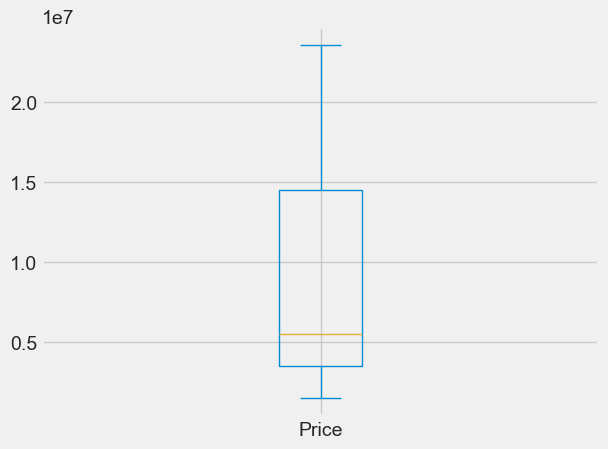

In [55]:
rent.loc[rent['Date_Added'].dt.year == 2013]['Price'].plot.box()

While the median is in the 5million range, the max value is over 20million. It is impossible to know if this value is an outlier, given the size of the 2013 dataset. We'll instead rechart without 2013 values.

In [56]:
avg_rent = rent.groupby(by=[rent.Date_Added.dt.year.loc[rent.Date_Added.dt.year > 2013]]).agg({'Price': np.mean})

median_rent = rent.groupby(by=[rent.Date_Added.dt.year.loc[rent.Date_Added.dt.year > 2013]]).agg({'Price': np.median})

<Figure size 2000x1200 with 0 Axes>

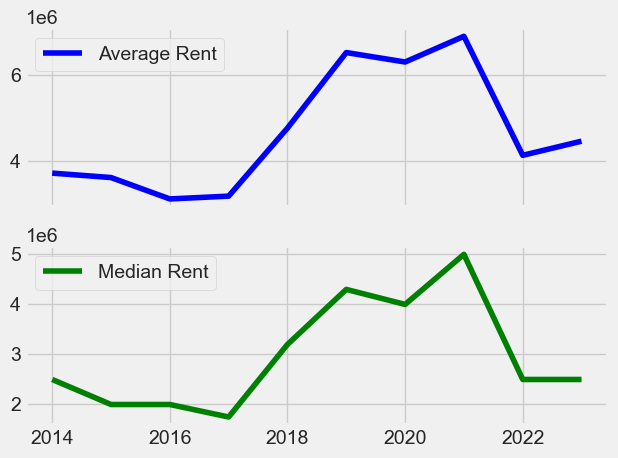

In [57]:
plt.figure(figsize=(20,12))
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(avg_rent, color='blue', label='Average Rent')
ax1.legend()
ax2.plot(median_rent, color='green', label='Median Rent')
ax2.legend()
plt.tight_layout()

The trends say something interesting. It seems that there was a spike in rent from 2017 which cooled in 2022. There may be a number of reasons for this:
1. Many of the listings are from 2022 so there's a larger range for mean values
2. Prices did in fact drop in 2022
3. 2022 prices include listings from lower rent areas while earlier years may not.

Let's review the dataframe to decide which of these is applicable

In [58]:
year_count = dict()
for i in range(2013, 2024):
    year_count[i] = len(rent.loc[rent['Date_Added'].dt.year == i])

year_count

{2013: 3,
 2014: 884,
 2015: 3567,
 2016: 3498,
 2017: 602,
 2018: 924,
 2019: 1050,
 2020: 1533,
 2021: 1879,
 2022: 9941,
 2023: 4440}

2022 has many more listings than any other year. Let's generate samples of 1000 from the years having listings greater than 1000 and plot that chart.

In [59]:
y2014 = rent.loc[rent['Date_Added'].dt.year == 2014]
y2015 = rent.loc[rent['Date_Added'].dt.year == 2015].sample(1000)
y2016 = rent.loc[rent['Date_Added'].dt.year == 2016].sample(1000)
y2017 = rent.loc[rent['Date_Added'].dt.year == 2017]
y2018 = rent.loc[rent['Date_Added'].dt.year == 2018]
y2019 = rent.loc[rent['Date_Added'].dt.year == 2019].sample(1000)
y2020 = rent.loc[rent['Date_Added'].dt.year == 2020].sample(1000)
y2021 = rent.loc[rent['Date_Added'].dt.year == 2021].sample(1000)
y2022 = rent.loc[rent['Date_Added'].dt.year == 2022].sample(1000)
y2023 = rent.loc[rent['Date_Added'].dt.year == 2023].sample(1000)

rent_sample = pd.concat([y2014, y2015, y2016, y2017,
                         y2018, y2019, y2020, y2021,
                         y2022, y2023])

In [60]:
avg_rent_sample = rent_sample.groupby(by=[rent_sample.Date_Added.dt.year]).agg({'Price': np.mean})

median_rent_sample = rent_sample.groupby(by=[rent_sample.Date_Added.dt.year]).agg({'Price': np.median})

<Figure size 2000x1200 with 0 Axes>

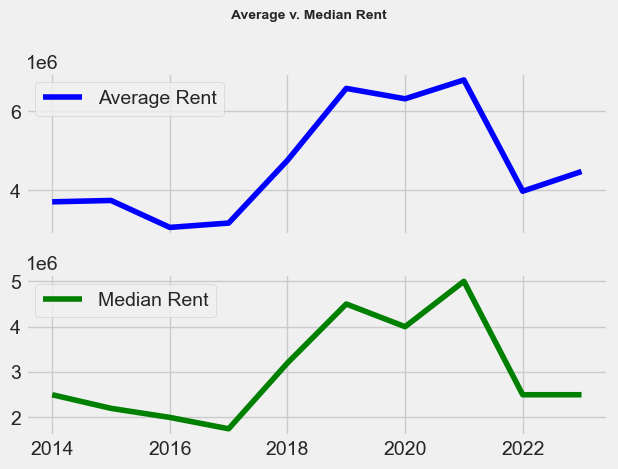

In [61]:
plt.figure(figsize=(20,12))
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(avg_rent_sample, color='blue', label='Average Rent')
ax1.legend()
ax2.plot(median_rent_sample, color='green', label='Median Rent')
ax2.legend()
plt.suptitle('Average v. Median Rent', weight='bold', size=10)
plt.tight_layout()

Surprisingly, the chart is still the same after reworking the year count values. This secondary chart confirms the claim that the cost of housing/ rent in Lagos ballooned in 2017 and peaked in 2021. Since 2022, we've seen a significant return to pre-2018 levels.

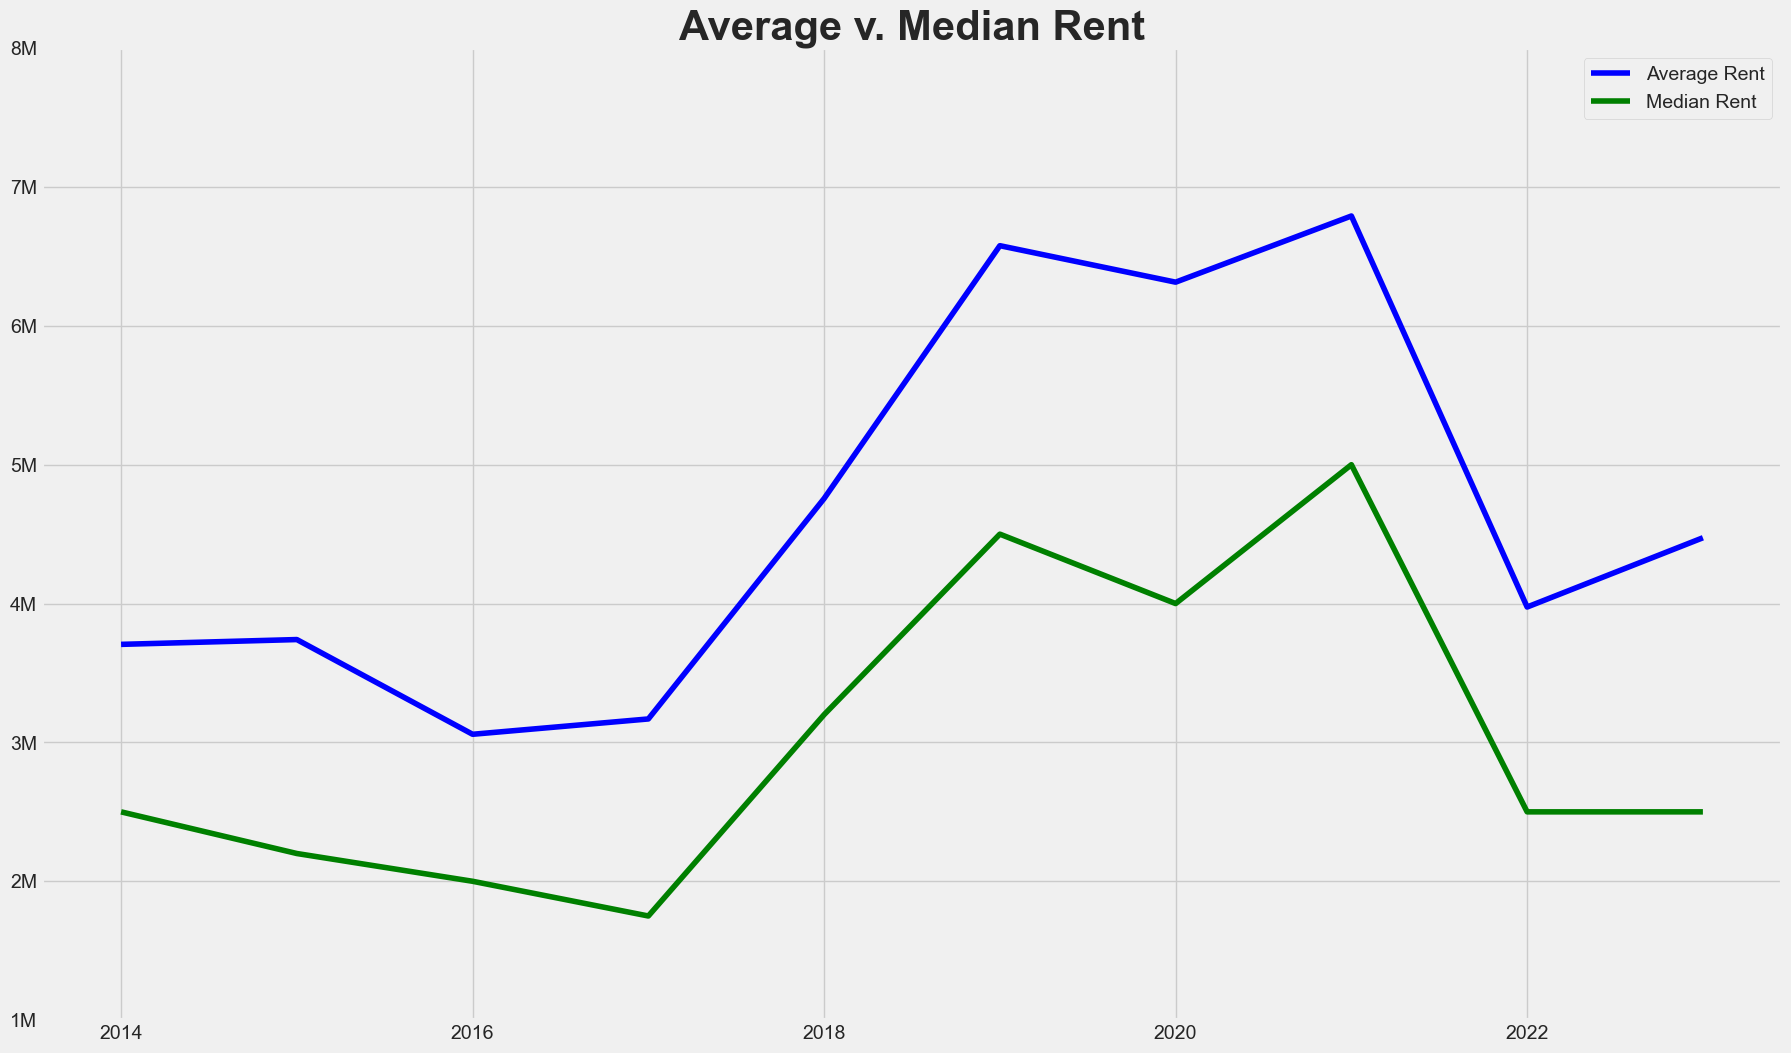

In [62]:
plt.figure(figsize=(20,12))

plt.plot(avg_rent_sample, color='blue', label='Average Rent')
plt.plot(median_rent_sample, color='green', label='Median Rent')
locs, labels = plt.yticks()
labels = ['1M', '2M', '3M', '4M', 
          '5M', '6M', '7M', '8M']
plt.yticks(ticks=locs, labels=labels)
plt.legend()
plt.title('Average v. Median Rent', weight='bold', size=30)
plt.show()

Let's consider how many cities are represented across the different years and then chart changes in rent for those cities, if they reflect the general mean/ median.

In [63]:
y2014 = rent.loc[rent['Date_Added'].dt.year == 2014]
y2015 = rent.loc[rent['Date_Added'].dt.year == 2015].sample(1000)
y2016 = rent.loc[rent['Date_Added'].dt.year == 2016].sample(1000)
y2017 = rent.loc[rent['Date_Added'].dt.year == 2017]
y2018 = rent.loc[rent['Date_Added'].dt.year == 2018]
y2019 = rent.loc[rent['Date_Added'].dt.year == 2019].sample(1000)
y2020 = rent.loc[rent['Date_Added'].dt.year == 2020].sample(1000)
y2021 = rent.loc[rent['Date_Added'].dt.year == 2021].sample(1000)
y2022 = rent.loc[rent['Date_Added'].dt.year == 2022].sample(1000)
y2023 = rent.loc[rent['Date_Added'].dt.year == 2023].sample(1000)

In [64]:
rent.loc[(rent['Date_Added'].dt.year == 2017) & (rent.loc[rent['City'] == 'Ikoyi'])]

KeyboardInterrupt: 

In [ ]:
cities = ['Ikoyi', 'Lekki', 'Victoria Island', 'Surulere', 'Ajah', 'Ikeja']
years = list(range(2014, 2024))
plt.figure(figsize=(20,12))
plot_num = list(range(1,7))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.title('Original Values', weight='bold')

for num, window in zip(plot_num, roll_win):
    plt.subplot(3, 2, num)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(window).mean())
    plt.title(f'Rolling Window: {window}', weight='bold')

plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

### Analytical Questions

This section will address analytical questions raised.

##### What is the average rent per city in Lagos?

In [ ]:
rent.groupby('City').agg({'Price': np.mean}).sort_values('Price', ascending=False).applymap('{:,.2f}'.format)

##### What is the median rent per city in Lagos?

In [ ]:
rent.groupby('City').agg({'Price': np.median}).sort_values('Price', ascending=False).applymap('{:,.2f}'.format)

In [ ]:
avg_rent_city = rent.groupby('City').agg({'Price': np.mean}).sort_values(by='Price', ascending=False).reset_index()
avg_rent_city = avg_rent_city.sort_values('Price').set_index('City')

med_rent_city = rent.groupby('City').agg({'Price': np.median}).sort_values(by='Price', ascending=False).reset_index()
med_rent_city = med_rent_city.sort_values('Price').set_index('City')


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
ax1.barh(avg_rent_city.index, avg_rent_city['Price'])
ax2.barh(med_rent_city.index, med_rent_city['Price'])
fig.suptitle('Average v. Median Rent \n Per City', size=30, weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Plot cross barh

##### What are the cities with the highest and lowest rents (actual, mean, median)?
The top 5 cities per average & median rent are Ikoyi, Victoria Island, Apapa, Lekki & Ikeja. Agege, Iju & Mushin are in the bottom average and median rent range.

##### Which cities provide property with rents within mean and median values.

In [ ]:
rent_mean = rent['Price'].mean()
f'{rent_mean:,.2f}'

The top 2 cities by average rent are the only cities with average rents above the dataset average. This confirms the left skewed nature of the distribution.

In [ ]:
rent_median = rent['Price'].median()
f'{rent_median:,.2f}'

The top 4 cities by median rents are the only cities with median rents above the dataset median.

3. Which cities provide property with rents within mean and median values.
4. For a person of X income range, what cities provide optimum rental value for a single person, a married couple, a family of 5 (the average family size in Lagos)?
5. Visualize and explain the correlation if any between number of bedrooms and bathrooms and rental value.
6. Visualize and explain the correlation if any, between the number of bedrooms and bathroom and city.
7. What is the state of affordable housing in Lagos?
    a. What is the median income in Lagos?
    b. How much of the property market in available within that range?
    c. Ratio of demand (available renters) v. supply (number of property within their range)
8. What does the dataset tell us about the housing deficit and the skewed housing market in Lagos?
9. The rate of change / inflation in the Lagos real estate market
10. ...